In [1]:
#1. When is the best time of day, day of the week, and time of year to fly to minimise delays?

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar as Cal

In [4]:
# Importing the flight data
data_f = pd.read_csv(r"C:\Users\Ridhwan\Desktop\UOL\PROGRAMMING COURSEWORK\joined_df.csv")

In [5]:
data_f.shape

(13979496, 26)

In [6]:
# changing settings to display all columns
pd.set_option("display.max_columns", None)

In [7]:
data_f.head(51)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12,0,0,0,0,0
5,2006,1,11,3,627.0,630,834.0,832,US,295,N733UW,127.0,122.0,108.0,2.0,-3.0,BDL,CLT,644,6,13,0,0,0,0,0
6,2006,1,11,3,825.0,820,1041.0,1021,US,349,N177UW,136.0,121.0,111.0,20.0,5.0,BDL,CLT,644,4,21,0,0,20,0,0
7,2006,1,11,3,942.0,945,1155.0,1148,US,356,N404US,133.0,123.0,121.0,7.0,-3.0,BDL,CLT,644,4,8,0,0,0,0,0
8,2006,1,11,3,1239.0,1245,1438.0,1445,US,775,N722UW,119.0,120.0,103.0,-7.0,-6.0,BDL,CLT,644,4,12,0,0,0,0,0
9,2006,1,11,3,1642.0,1645,1841.0,1845,US,1002,N104UW,119.0,120.0,105.0,-4.0,-3.0,BDL,CLT,644,4,10,0,0,0,0,0


#### We will be using Pearsons correlation as oppossed to Spearmans and kendalls correllation as we want to compare two continous variables and their effect on eachother

In [8]:
# Syntax of corre() 
data_f.corr(method='pearson', min_periods=1)

# Correlation between two Arrival Delay and Departure Delay.
corr=data_f['ArrDelay'].corr(data_f['DepDelay'])
print(corr)


0.9125464898085639


We can see that Arrival delays have a strong effect on Departure Delays and have a strong positive relation
Hence Arrival delays are responsible for majority of Departure Delays

# We now look at the the best time of the year to fly

### By looking at the average delay in minutes per month

In [10]:
Monthdelaytable = data_f.groupby('Month').aggregate(mean_ArrDelay = ('ArrDelay', np.mean),
                                                    mean_DepDelay = ('DepDelay', np.mean),
                                                    mean_CarrierDelay = ('CarrierDelay', np.mean),
                                                    mean_WeatherDelay = ('WeatherDelay', np.mean),
                                                    mean_NASDelay = ('NASDelay', np.mean),
                                                    mean_SecurityDelay = ('SecurityDelay', np.mean),
                                                    mean_LateAircraftDelay = ('LateAircraftDelay', np.mean))

In [11]:
Months_str = ['January', 'February', 'March', 'April',"May",'June','July','August','September','October','November','December']
Months_str = pd.Categorical(Months_str, categories=Months_str, ordered=True)
Monthdelaytable["Months_str"]= Months_str


In [12]:
month_df= pd.DataFrame(Monthdelaytable)
month_df

,mean_ArrDelay,mean_DepDelay,mean_CarrierDelay,mean_WeatherDelay,mean_NASDelay,mean_SecurityDelay,mean_LateAircraftDelay,Months_str
Month,,,,,,,,
1,7.781946,9.378074,3.311288,0.819670,3.665215,0.018634,3.978840,January
2,6.702740,8.325776,2.975188,0.595128,3.484345,0.028036,3.683058,February
3,7.716093,9.370350,3.092614,0.573590,3.563987,0.033912,4.170374,March
4,4.442250,6.446929,2.581838,0.423603,2.604210,0.026526,3.109842,April
5,4.900331,6.821401,2.570591,0.471078,2.751168,0.010671,3.265493,May
6,10.824172,11.731690,3.820044,0.893817,4.019968,0.018389,5.216681,June
7,12.460602,13.346279,4.162333,1.000346,4.408748,0.020791,6.003276,July
8,8.708773,9.892819,3.548254,0.725051,3.430215,0.068720,4.451620,August
9,5.491862,6.755134,2.786847,0.517228,3.122396,0.017388,3.256387,September


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

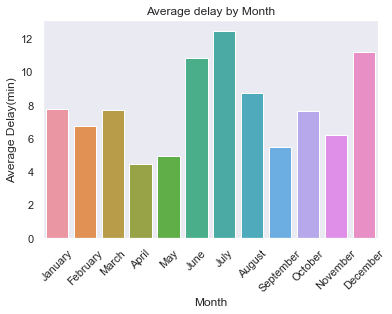

In [14]:
sns.barplot(data=month_df, x="Months_str",y="mean_ArrDelay").set(title="Average delay by Month", xlabel="Month",ylabel="Average Delay(min)")

plt.xticks(rotation=45)

In [15]:
#We will now be taking a look at why these delays have occurred b

In [16]:
 Monthdelaytable_spc = data_f.groupby('Month').aggregate(mean_CarrierDelay = ('CarrierDelay', np.mean), mean_WeatherDelay = ('WeatherDelay', np.mean), mean_NASDelay = ('NASDelay', np.mean), mean_SecurityDelay = ('SecurityDelay', np.mean), mean_LateAircraftDelay = ('LateAircraftDelay', np.mean))                                                   
                                                  

In [17]:
Monthdelaytable_spc["Months_str"]= Months_str  
Monthdelaytable_spc

,mean_CarrierDelay,mean_WeatherDelay,mean_NASDelay,mean_SecurityDelay,mean_LateAircraftDelay,Months_str
Month,,,,,,
1,3.311288,0.819670,3.665215,0.018634,3.978840,January
2,2.975188,0.595128,3.484345,0.028036,3.683058,February
3,3.092614,0.573590,3.563987,0.033912,4.170374,March
4,2.581838,0.423603,2.604210,0.026526,3.109842,April
5,2.570591,0.471078,2.751168,0.010671,3.265493,May
6,3.820044,0.893817,4.019968,0.018389,5.216681,June
7,4.162333,1.000346,4.408748,0.020791,6.003276,July
8,3.548254,0.725051,3.430215,0.068720,4.451620,August
9,2.786847,0.517228,3.122396,0.017388,3.256387,September


In [18]:
month_df_spc= pd.DataFrame(Monthdelaytable_spc)
month_df_spc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   mean_CarrierDelay       12 non-null     float64 
 1   mean_WeatherDelay       12 non-null     float64 
 2   mean_NASDelay           12 non-null     float64 
 3   mean_SecurityDelay      12 non-null     float64 
 4   mean_LateAircraftDelay  12 non-null     float64 
 5   Months_str              12 non-null     category
dtypes: category(1), float64(5)
memory usage: 984.0 bytes


In [19]:
#with sns.axes_style("darkgrid"):
                              #  fig, ax = plt.subplots(1, 1, figsize = (9, 9))
                                ax.plot(Monthdelaytable_spc, alpha = 0.99)
                                ax.set_xlabel('Month')
                                ax.set_ylabel('Average delay(mins)')
                                ax.set_title('Reasons for delay by month')
                                ax.legend(Monthdelaytable_spc, loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=4)
                                

IndentationError: unexpected indent (4023332462.py, line 3)

In [20]:
#fig, ax = plt.subplots(1, 1, figsize = (9, 9))
#ax.plot(Monthdelaytable_spc, alpha = 0.99)
ax.set_xlabel('Months_str')
ax.set_ylabel('Average delay(mins)')
ax.set_title('Reasons for delay by month')
ax.legend(Monthdelaytable_spc, loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=4)
                                

NameError: name 'ax' is not defined

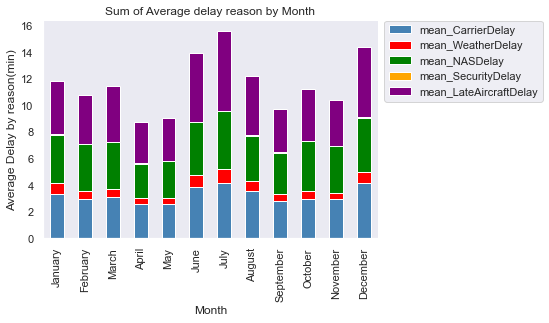

In [21]:
month_df_spc.set_index('Months_str').plot(kind='bar', stacked=True, color=['steelblue', 'red','green','orange','purple']).set(title="Sum of Average delay reason by Month", xlabel="Month",ylabel="Average Delay by reason(min)")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine()

# We will now take a look at whats the best day of the week to fly

In [23]:
data_f.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12,0,0,0,0,0


In [24]:
data_f.DayOfWeek.value_counts()

5    2061540
1    2051844
4    2051644
3    2039087
2    2025073
7    1964722
6    1785586
Name: DayOfWeek, dtype: int64

In [25]:
Weekdelaytable = data_f.groupby('DayOfWeek').aggregate(mean_ArrDelay = ('ArrDelay', np.mean),
                                                    mean_DepDelay = ('DepDelay', np.mean),
                                                    mean_CarrierDelay = ('CarrierDelay', np.mean),
                                                    mean_WeatherDelay = ('WeatherDelay', np.mean),
                                                    mean_NASDelay = ('NASDelay', np.mean),
                                                    mean_SecurityDelay = ('SecurityDelay', np.mean),
                                                    mean_LateAircraftDelay = ('LateAircraftDelay', np.mean))


In [26]:
Weekdelaytable

,mean_ArrDelay,mean_DepDelay,mean_CarrierDelay,mean_WeatherDelay,mean_NASDelay,mean_SecurityDelay,mean_LateAircraftDelay
DayOfWeek,,,,,,,
1,8.275616,9.634694,3.231675,0.701817,3.654377,0.019245,4.362125
2,5.725004,7.207232,2.782180,0.533393,3.246007,0.012493,3.323730
3,7.697830,8.570447,2.898568,0.667031,3.928486,0.024114,3.953883
4,10.545961,10.881546,3.426242,0.797247,4.315990,0.042926,5.030361
5,10.846670,11.732738,3.687025,0.749780,4.011721,0.024844,5.312895
6,4.197540,7.356873,3.293504,0.538287,2.234891,0.025416,2.960895
7,7.224410,9.341420,3.406282,0.612658,3.184328,0.031746,4.011786


In [27]:
Days_str = ['Mon', 'Tues', 'Wed', 'Thurs',"Fri",'Sat','Sun']
Days_str = pd.Categorical(Days_str, categories=Days_str, ordered=True)
Weekdelaytable["Days_str"]= Days_str

In [28]:
Weekdelaytable

,mean_ArrDelay,mean_DepDelay,mean_CarrierDelay,mean_WeatherDelay,mean_NASDelay,mean_SecurityDelay,mean_LateAircraftDelay,Days_str
DayOfWeek,,,,,,,,
1,8.275616,9.634694,3.231675,0.701817,3.654377,0.019245,4.362125,Mon
2,5.725004,7.207232,2.782180,0.533393,3.246007,0.012493,3.323730,Tues
3,7.697830,8.570447,2.898568,0.667031,3.928486,0.024114,3.953883,Wed
4,10.545961,10.881546,3.426242,0.797247,4.315990,0.042926,5.030361,Thurs
5,10.846670,11.732738,3.687025,0.749780,4.011721,0.024844,5.312895,Fri
6,4.197540,7.356873,3.293504,0.538287,2.234891,0.025416,2.960895,Sat
7,7.224410,9.341420,3.406282,0.612658,3.184328,0.031746,4.011786,Sun


In [29]:
week_df_spc= pd.DataFrame(Weekdelaytable)
week_df_spc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 1 to 7
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   mean_ArrDelay           7 non-null      float64 
 1   mean_DepDelay           7 non-null      float64 
 2   mean_CarrierDelay       7 non-null      float64 
 3   mean_WeatherDelay       7 non-null      float64 
 4   mean_NASDelay           7 non-null      float64 
 5   mean_SecurityDelay      7 non-null      float64 
 6   mean_LateAircraftDelay  7 non-null      float64 
 7   Days_str                7 non-null      category
dtypes: category(1), float64(7)
memory usage: 811.0 bytes


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tues'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thurs'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

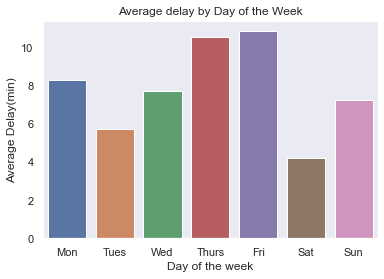

In [30]:
sns.barplot(data=week_df_spc, x="Days_str",y="mean_ArrDelay").set(title="Average delay by Day of the Week", xlabel="Day of the week",ylabel="Average Delay(min)")

plt.xticks(rotation=0)

In [31]:
week_df_spc.drop(['mean_ArrDelay', 'mean_DepDelay'], axis = 1, inplace= True)

In [32]:
week_df_spc

,mean_CarrierDelay,mean_WeatherDelay,mean_NASDelay,mean_SecurityDelay,mean_LateAircraftDelay,Days_str
DayOfWeek,,,,,,
1,3.231675,0.701817,3.654377,0.019245,4.362125,Mon
2,2.782180,0.533393,3.246007,0.012493,3.323730,Tues
3,2.898568,0.667031,3.928486,0.024114,3.953883,Wed
4,3.426242,0.797247,4.315990,0.042926,5.030361,Thurs
5,3.687025,0.749780,4.011721,0.024844,5.312895,Fri
6,3.293504,0.538287,2.234891,0.025416,2.960895,Sat
7,3.406282,0.612658,3.184328,0.031746,4.011786,Sun


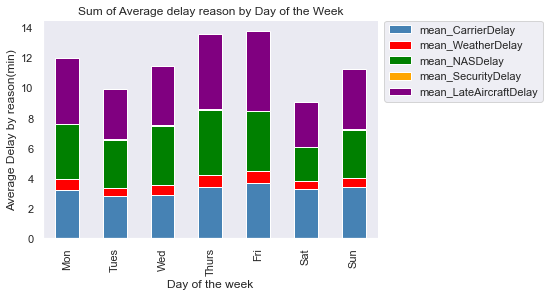

In [33]:
week_df_spc.set_index('Days_str').plot(kind='bar', stacked=True, color=['steelblue', 'red','green','orange','purple']).set(title="Sum of Average delay reason by Day of the Week", xlabel="Day of the week",ylabel="Average Delay by reason(min)")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine()

In [34]:
data_f

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13979491,2005,12,22,4,1652.0,1655,1815.0,1837,DL,901,N109DL,263.0,282.0,241.0,-22.0,-3.0,ATL,ONT,1900,7,15,0,0,0,0,0
13979492,2005,12,22,4,1825.0,1825,1858.0,1848,DL,902,N932DL,93.0,83.0,54.0,10.0,0.0,ATL,MEM,332,7,32,0,0,0,0,0
13979493,2005,12,22,4,1507.0,1511,1641.0,1649,DL,903,N306DL,154.0,158.0,121.0,-8.0,-4.0,ATL,SAT,874,4,29,0,0,0,0,0
13979494,2005,12,22,4,924.0,925,1056.0,1111,DL,904,N981DL,152.0,166.0,129.0,-15.0,-1.0,ATL,MSP,906,4,19,0,0,0,0,0


# We now look at the best time of the day to take flight as to minimize delays

In [ ]:
#We now look at the best time of the day to take flight as to minimize delays
#To get to our solution we'll be catgeorizing into 4 time slots by DepTime
#(00:00-06:00),(06:01-12:00),(12:01-18:00),(18:01-23:59)````


In [35]:
def classifier(CRSDeptime):
    if CRSDeptime >= 0 and CRSDeptime <=600:
        class_str= "12am - 6am"
    else:
        if CRSDeptime >= 601 and CRSDeptime <=1200:
            class_str= "6am - 12pm"
        else:
            if CRSDeptime >= 1201 and CRSDeptime <=1800:
                class_str= "12pm - 6pm"
            else:
                class_str="6pm - 12am" 
    return class_str

In [36]:
data_f["TimeFrame"] = data_f["CRSDepTime"].apply(classifier)

In [37]:
data_f.TimeFrame.value_counts()

6am - 12pm    5446319
12pm - 6pm    5367586
6pm - 12am    2854061
12am - 6am     311530
Name: TimeFrame, dtype: int64

In [38]:
Slotdelaytable = data_f.groupby('TimeFrame').aggregate(mean_ArrDelay = ('ArrDelay', np.mean),
                                                    mean_DepDelay = ('DepDelay', np.mean),
                                                    mean_CarrierDelay = ('CarrierDelay', np.mean),
                                                    mean_WeatherDelay = ('WeatherDelay', np.mean),
                                                    mean_NASDelay = ('NASDelay', np.mean),
                                                    mean_SecurityDelay = ('SecurityDelay', np.mean),
                                                    mean_LateAircraftDelay = ('LateAircraftDelay', np.mean))

In [39]:
range_str = ['12am - 6am', '6am - 12pm', '12pm - 6pm', '6pm - 12am']
range_str = pd.Categorical(range_str, categories=range_str, ordered=True)
Slotdelaytable["range_str"]= range_str

In [40]:
Slotdelaytable

,mean_ArrDelay,mean_DepDelay,mean_CarrierDelay,mean_WeatherDelay,mean_NASDelay,mean_SecurityDelay,mean_LateAircraftDelay,range_str
TimeFrame,,,,,,,,
12am - 6am,-0.360042,1.794652,2.850278,0.385812,1.488152,0.029593,0.490203,12am - 6am
12pm - 6pm,10.500076,11.599415,3.316083,0.753383,4.692408,0.024430,5.028538,6am - 12pm
6am - 12pm,2.676874,4.200630,2.814966,0.375515,2.424917,0.026627,1.433343,12pm - 6pm
6pm - 12am,13.710216,15.467159,3.980483,1.057204,3.712908,0.026499,8.141197,6pm - 12am


(array([0, 1, 2, 3]),
 [Text(0, 0, '12am - 6am'),
  Text(1, 0, '6am - 12pm'),
  Text(2, 0, '12pm - 6pm'),
  Text(3, 0, '6pm - 12am')])

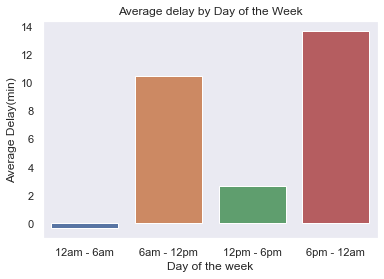

In [41]:
sns.barplot(data=Slotdelaytable, x="range_str",y="mean_ArrDelay").set(title="Average delay by Day of the Week", xlabel="Day of the week",ylabel="Average Delay(min)")

plt.xticks(rotation=0)

In [42]:
Slotdelaytable.drop(['mean_ArrDelay', 'mean_DepDelay'], axis = 1, inplace= True)

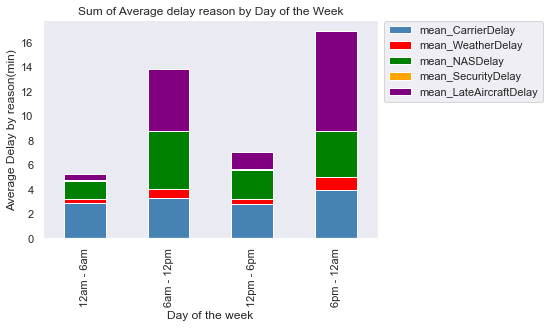

In [44]:
Slotdelaytable.set_index('range_str').plot(kind='bar', stacked=True, color=['steelblue', 'red','green','orange','purple']).set(title="Sum of Average delay reason by Day of the Week", xlabel="Day of the week",ylabel="Average Delay by reason(min)")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.despine()